# Google Data Analytics Professional Certificate

### Case study: How does NYC Citi Bike navigate speedy success?

# 1. Introduction

## 1.1 Scenario

You work as a junior data analyst. A new project arises from the company called Citi Bike, a bike-share company in NYC.  According to the director of marketing, maximizing the number of annual memberships will contribute to the company's future sucess.

Essentially, the objective of the project is to understand how casual riders and annual members use Cyclistic bikes differently. The marketing team will then be able to utilise the data analyzation findings and insights to help them in their data-driven decisions.

To clarify some terms, casual riders are defined as customers who purchase single-ride or full-day passes, while annual members are those who purchase annual memberships.

This project will be analyzing the data for the year 2023.

## 1.2 Company background

Citi Bike was launched in 2013. They have now grown to have a fleet of over 27,000 bicycles and a network of more than 1,500 stations across New York City. The bikes can be unlocked from one station and returned to any other station in the system at any time

## 1.3 Analyzation method

This case study will be analyzed using Google's 6 Steps of the Data Analysis Process. Ask, Prepare, Process, Analyze, Share, and Act.The project was advised to be carried out using SQL, RStudio and Tableau, but I will only be using Python for my own practice.

# 2. Ask Phase

During the "Ask" phase, we ask many questions, and also questions about the questions, as specfic as possible. These questions aims to identify what problems we need to solve while considering the needs of the stakeholders. This phase helps us to dive deeper into the problem in order to obtain better clarity and understanding of the problem.

Deliverable: clear statement of the business task.

## 2.1 Business task

As mentioned in the introduction, the main task of the project is to understand: 

How casual riders and annual members use Citi Bike bikes differently for the year 2023.

# 3. Prepare Phase

During the "Prepare" phase, we prepare our data collection methodology. Do we require qualitative or quantitative data, do we collect our data through surveys, interviews or existing sources, how do we avoid bias during the data collection process, these are all relevant questions needed to be answered during this phase.

Deliverable: descriptions of all data sources used.

## 3.1 Descriptions of Data Sources Used

The dataset used has been made available by [NYCBS Data Use Policy.](https://s3.amazonaws.com/tripdata/index.html) under this [license](https://ride.citibikenyc.com/data-sharing-policy).

# 4. Process Phase

The "Process" phase is where the data collected are being processed, this includes connecting the data sources, cleaning the data, filtering and choosing the data, calculating the confidence level of the data etc.

Deliverable: documentation of any cleaning or manipulation of data.

## 4.1 Documentation of data cleaning and manipulation

I will be using Pandas for the data cleaning and manipulations. The actions that I carried out are as follows:

The data for each month are in a seperate zip file, I downloded each file individually from the month of february up to December. 
Then I merge these files into one data file that store all the csv file of each month which enable me to analyze them in term of the year 2023.
After, collecting the csv file I Rename the columns to make them consistent

Identify the columns and type of each column of the data frame.
Check for null values.
Drop the null values (if any), and reconfirm that there are no longer null values
I did not delete columns
Check for duplicates.
Drop the duplicated values (if any), and reconfirm that there are no longer duplicated values
Modify the data type of certain column.

Convert started_at column and ended_at column from "object" to "datetime64"
To extract the hour, day, month and date to form new columns based on them
To calculate the ride duration
Check the order of the day, month.
Create a new column ride_duration that calculates the duration of each ride.
Express the ride duration in terms of only minutes , and not minutes and seconds
Check whether there are negative values for the ride duration which would be illogical
Remove the rows that have negative values
Export the file of the cleaned data.

### 4.1.1 Importing Libraries

In [52]:
import pandas as pd
import numpy as np

### 4.1.2 Importing Data

In [53]:
# STEP 1: COLLECT DATA
df = pd.read_csv('/Users/noahscomputer/Documents/citi_bike_data/combined_citi_bike_data.csv')

### 4.1.3 Print the first 5 entries

In [54]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E2E964A161F786AB,classic_bike,2023-08-07 19:37:47,2023-08-07 19:41:14,6 St & Grand St,HB302,Madison St & 10 St,HB503,40.744398,-74.034501,40.749943,-74.035865,member
1,0660F2E48E3BB87F,classic_bike,2023-08-01 13:16:22,2023-08-01 13:26:02,6 St & Grand St,HB302,6 St & Grand St,HB302,40.744398,-74.034501,40.744398,-74.034501,member
2,940FC7C675232897,classic_bike,2023-08-15 17:28:23,2023-08-15 17:50:35,Heights Elevator,JC059,Heights Elevator,JC059,40.748721,-74.040480,40.748716,-74.040443,member
3,E967660CC5CD585B,classic_bike,2023-08-01 12:44:24,2023-08-01 12:49:45,Hoboken Ave at Monmouth St,JC105,Hoboken Terminal - River St & Hudson Pl,HB102,40.735279,-74.046830,40.736068,-74.029127,member
4,D997CB0B855FE2D6,classic_bike,2023-08-08 12:31:16,2023-08-08 12:40:18,Hoboken Ave at Monmouth St,JC105,Hoboken Terminal - River St & Hudson Pl,HB102,40.735208,-74.046964,40.736068,-74.029127,member


### 4.1.3 Print the last 5 entries

In [55]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
988846,EE6CF90DF3984253,classic_bike,2023-11-22 16:20:23,2023-11-22 16:26:38,Glenwood Ave,JC094,Bergen Ave & Sip Ave,JC109,40.727551,-74.071061,40.731009,-74.064437,member
988847,DB574978E7FABC08,classic_bike,2023-11-21 07:01:57,2023-11-21 07:06:14,Glenwood Ave,JC094,Bergen Ave & Sip Ave,JC109,40.727551,-74.071061,40.731009,-74.064437,member
988848,E8E26D6A35E922FA,classic_bike,2023-11-14 07:51:51,2023-11-14 08:04:20,Glenwood Ave,JC094,Montgomery St,JC099,40.727755,-74.071096,40.719420,-74.050990,member
988849,0D6ECB6E18E32C63,classic_bike,2023-11-17 08:15:06,2023-11-17 08:26:57,Glenwood Ave,JC094,Montgomery St,JC099,40.727624,-74.071103,40.719420,-74.050990,member
988850,817DBC6302EDF681,classic_bike,2023-11-16 10:55:31,2023-11-16 11:03:47,Glenwood Ave,JC094,Hilltop,JC019,40.727551,-74.071061,40.731169,-74.057574,member


### 4.1.5 Rename headers of the dataframe

In [56]:
# Rename to make them consistent
headers = ["trip_id",
           "bike_type",
           "start_time",
           "end_time",
           "from_station_name",
           "from_station_id",
           "to_station_name",
           "to_station_id",
           "start_latitude",
           "start_longitude",
           "end_latitude",
           "end_longitude",
           "user_type"]

In [57]:
df.columns = headers

In [58]:
#Check Used the head()to displayed the first 3 columns of the data frame

df.head(3)

,trip_id,bike_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_latitude,start_longitude,end_latitude,end_longitude,user_type
0,E2E964A161F786AB,classic_bike,2023-08-07 19:37:47,2023-08-07 19:41:14,6 St & Grand St,HB302,Madison St & 10 St,HB503,40.744398,-74.034501,40.749943,-74.035865,member
1,0660F2E48E3BB87F,classic_bike,2023-08-01 13:16:22,2023-08-01 13:26:02,6 St & Grand St,HB302,6 St & Grand St,HB302,40.744398,-74.034501,40.744398,-74.034501,member
2,940FC7C675232897,classic_bike,2023-08-15 17:28:23,2023-08-15 17:50:35,Heights Elevator,JC059,Heights Elevator,JC059,40.748721,-74.040480,40.748716,-74.040443,member


In [59]:
df.replace('?', np.nan, inplace = True)

### 4.1.7 Identify the data types of the dataframe columns

In [60]:
df.dtypes

trip_id               object
bike_type             object
start_time            object
end_time              object
from_station_name     object
from_station_id       object
to_station_name       object
to_station_id         object
start_latitude       float64
start_longitude      float64
end_latitude         float64
end_longitude        float64
user_type             object
dtype: object

### 4.1.8 Identify the statistical description of the dataset, including that of 'object' data types.

In [61]:
df.describe(include='all')

,trip_id,bike_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_latitude,start_longitude,end_latitude,end_longitude,user_type
count,988851,988851,988851,988851,988766,988766,985532,985532,988851.000000,988851.000000,987897.000000,987897.000000,988851
unique,988851,3,960442,963006,351,351,552,549,NaN,NaN,NaN,NaN,2
top,E2E964A161F786AB,classic_bike,2023-08-24 18:19:41,2023-11-08 15:56:19,Grove St PATH,JC115,Grove St PATH,JC115,NaN,NaN,NaN,NaN,member
freq,1,854116,5,20,47010,47010,52126,52126,NaN,NaN,NaN,NaN,731783
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.732335,-74.040128,40.732309,-74.039856,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012192,0.011929,0.012319,0.011992,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.678334,-74.087223,40.645070,-74.190000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721124,-74.045572,40.721124,-74.044247,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.735208,-74.037683,40.735208,-74.037683,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.742301,-74.031028,40.742258,-74.030970,NaN


### 4.1.9 Identify the summary information of the dataset

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988851 entries, 0 to 988850
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            988851 non-null  object 
 1   bike_type          988851 non-null  object 
 2   start_time         988851 non-null  object 
 3   end_time           988851 non-null  object 
 4   from_station_name  988766 non-null  object 
 5   from_station_id    988766 non-null  object 
 6   to_station_name    985532 non-null  object 
 7   to_station_id      985532 non-null  object 
 8   start_latitude     988851 non-null  float64
 9   start_longitude    988851 non-null  float64
 10  end_latitude       987897 non-null  float64
 11  end_longitude      987897 non-null  float64
 12  user_type          988851 non-null  object 
dtypes: float64(4), object(9)
memory usage: 98.1+ MB


### 4.1.10 Identify and handle missing values

#### Replace '?' with 'NaN'

In [63]:
df.replace('?', np.nan, inplace = True)
df.head(5)

,trip_id,bike_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_latitude,start_longitude,end_latitude,end_longitude,user_type
0,E2E964A161F786AB,classic_bike,2023-08-07 19:37:47,2023-08-07 19:41:14,6 St & Grand St,HB302,Madison St & 10 St,HB503,40.744398,-74.034501,40.749943,-74.035865,member
1,0660F2E48E3BB87F,classic_bike,2023-08-01 13:16:22,2023-08-01 13:26:02,6 St & Grand St,HB302,6 St & Grand St,HB302,40.744398,-74.034501,40.744398,-74.034501,member
2,940FC7C675232897,classic_bike,2023-08-15 17:28:23,2023-08-15 17:50:35,Heights Elevator,JC059,Heights Elevator,JC059,40.748721,-74.040480,40.748716,-74.040443,member
3,E967660CC5CD585B,classic_bike,2023-08-01 12:44:24,2023-08-01 12:49:45,Hoboken Ave at Monmouth St,JC105,Hoboken Terminal - River St & Hudson Pl,HB102,40.735279,-74.046830,40.736068,-74.029127,member
4,D997CB0B855FE2D6,classic_bike,2023-08-08 12:31:16,2023-08-08 12:40:18,Hoboken Ave at Monmouth St,JC105,Hoboken Terminal - River St & Hudson Pl,HB102,40.735208,-74.046964,40.736068,-74.029127,member


#### Count missing values in each column

In [64]:
df.isnull().sum()

trip_id                 0
bike_type               0
start_time              0
end_time                0
from_station_name      85
from_station_id        85
to_station_name      3319
to_station_id        3319
start_latitude          0
start_longitude         0
end_latitude          954
end_longitude         954
user_type               0
dtype: int64

Based on the summary above, each column has 988851 rows of data and six of the columns containing missing data:

1. "from_station_name": 85 missing data
2. "from_station_id": 85 missing data
3. "to_station_name": 3319 missing data
4. "to_station_id": 3319 missing data
5. "end_latitude": 954 missing data
6. "end_longitude": 954 missing data

### 4.1.11 Deal with missing data 

#### Replace it by mode

##### Replace the missing "start_station_name","start_station_id" values by the most frequent

In [65]:
# replace the missing 'start_station_name' , "start_station_id" values by the most frequent
df["from_station_name"].mode()

0    Grove St PATH
Name: from_station_name, dtype: object

In [66]:
df["from_station_name"].replace(np.nan , "Grove St PATH", inplace = True)

In [67]:
df["from_station_id"].mode()

0    JC115
Name: from_station_id, dtype: object

In [68]:
df["from_station_id"].replace (np.nan, "JC115" ,inplace = True)

#### Replace it by mean

##### Replace "NaN" with the mean value in the "end_lat"  and "end_lng" column

In [69]:
avg_end_lat = df["end_latitude"].astype('float').mean(axis = 0)

In [70]:
df["end_latitude"].replace(np.nan,avg_end_lat, inplace = True )

In [71]:
avg_end_lng = df["end_longitude"].astype('float').mean(axis = 0)

In [72]:
df["end_longitude"].replace(np.nan,avg_end_lng, inplace = True)

#### Drop the whole row

##### Drop all rows that do not have end_station_name and end_station_id data:

In [73]:
df.dropna(subset = ["to_station_name"], axis = 0, inplace = True)

In [74]:
df.dropna(subset = ["to_station_id"], axis = 0, inplace = True)

#### Reset index because we drop rows 

In [75]:
df.reset_index(drop = True, inplace = True)

#### Check if we hava missing values 

In [76]:
df.isnull().sum()

trip_id              0
bike_type            0
start_time           0
end_time             0
from_station_name    0
from_station_id      0
to_station_name      0
to_station_id        0
start_latitude       0
start_longitude      0
end_latitude         0
end_longitude        0
user_type            0
dtype: int64

### 4.1.12 Check for duplicated values.

In [77]:
df.duplicated().sum()

0

### 4.1.13 Correct data format

In [78]:
df.dtypes

trip_id               object
bike_type             object
start_time            object
end_time              object
from_station_name     object
from_station_id       object
to_station_name       object
to_station_id         object
start_latitude       float64
start_longitude      float64
end_latitude         float64
end_longitude        float64
user_type             object
dtype: object

#### Convert data types to proper format

In [79]:
# Convert the 'started_at' and 'ended_at' columns to datetime

df[["start_time","end_time"]] = df[["start_time", "end_time"]].astype('datetime64')

#### Check the columns after the conversion

In [80]:
df.dtypes

trip_id                      object
bike_type                    object
start_time           datetime64[ns]
end_time             datetime64[ns]
from_station_name            object
from_station_id              object
to_station_name              object
to_station_id                object
start_latitude              float64
start_longitude             float64
end_latitude                float64
end_longitude               float64
user_type                    object
dtype: object

### 4.1.14 Create new columns that extract the hour, date, day, and month

In [81]:
df['hour'] = df['start_time'].dt.hour # To extract the hour
df['date'] = df['start_time'].dt.day #To extract the date
df['day'] = df['start_time'].dt.day_name() # To extract the day of the week
df['month'] = df['start_time'].dt.month_name() # To extract the month

df.head(2)

,trip_id,bike_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_latitude,start_longitude,end_latitude,end_longitude,user_type,hour,date,day,month
0,E2E964A161F786AB,classic_bike,2023-08-07 19:37:47,2023-08-07 19:41:14,6 St & Grand St,HB302,Madison St & 10 St,HB503,40.744398,-74.034501,40.749943,-74.035865,member,19,7,Monday,August
1,0660F2E48E3BB87F,classic_bike,2023-08-01 13:16:22,2023-08-01 13:26:02,6 St & Grand St,HB302,6 St & Grand St,HB302,40.744398,-74.034501,40.744398,-74.034501,member,13,1,Tuesday,August


### 4.1.15 Create a new column that calculates the duration of each ride

In [82]:
df['ride_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds()/60

In [83]:
df.head(2)

,trip_id,bike_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_latitude,start_longitude,end_latitude,end_longitude,user_type,hour,date,day,month,ride_duration
0,E2E964A161F786AB,classic_bike,2023-08-07 19:37:47,2023-08-07 19:41:14,6 St & Grand St,HB302,Madison St & 10 St,HB503,40.744398,-74.034501,40.749943,-74.035865,member,19,7,Monday,August,3.450000
1,0660F2E48E3BB87F,classic_bike,2023-08-01 13:16:22,2023-08-01 13:26:02,6 St & Grand St,HB302,6 St & Grand St,HB302,40.744398,-74.034501,40.744398,-74.034501,member,13,1,Tuesday,August,9.666667


### 4.1.16 Verify if the dataframe includes negative entries 

In [84]:
df[df['ride_duration']< 0 ].count()

trip_id              7
bike_type            7
start_time           7
end_time             7
from_station_name    7
from_station_id      7
to_station_name      7
to_station_id        7
start_latitude       7
start_longitude      7
end_latitude         7
end_longitude        7
user_type            7
hour                 7
date                 7
day                  7
month                7
ride_duration        7
dtype: int64

#### There are 7 rides with negative ride_durations. The negative entries are due to instances where bikes were taken out of docks for quality checked. 

### 4.1.17 Filter out rows with negative ride durations

In [85]:
 df = df[df['ride_duration'] >= 0 ]

In [86]:
df[df['ride_duration']< 0 ].count()

trip_id              0
bike_type            0
start_time           0
end_time             0
from_station_name    0
from_station_id      0
to_station_name      0
to_station_id        0
start_latitude       0
start_longitude      0
end_latitude         0
end_longitude        0
user_type            0
hour                 0
date                 0
day                  0
month                0
ride_duration        0
dtype: int64

### 4.1.18 Export the cleaned dataset as a .csv file

In [87]:
df.to_csv("cycle_cleaned.csv")

## 5. CONDUCT DESCRIPTIVE ANALYSIS: 
### Analyze and Share Phase
The "Analyze" phase is where we perform exploratory data analysis, in which we analyze the cleaned data through aggregation (sum, max, mean etc), calculation, correlation etc. This is also the phase where we identify what story does the data tell, their relationships and trends.

The "Share" phase is where we decide what to present and share with the stakeholders. Do we present our data through reports, dashboards or meetings etc. This is also the phase where we create compelling data visualizations that provides insights for the stakeholders.

Deliverable: A summary of analysis with supporting visualizations and key findings

### 5.1 A summary of your analysis with visualizations

#### The analysis will be done using Pandas and matplotlib for the data visualizations The questions that I explored were: 
1. How do annual members and casual riders use Citi bikes di erently?
- How many were taken by casual and membered riders?
2. Numbers of rides across hours, weedays,and month

3. Which type of bikes are most popular by member types across the months?


### 5.1.1 Importing Libraries

In [88]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### 5.1.2 Importing Data

In [89]:
df = pd.read_csv('cycle_cleaned.csv')
df.head(3)

,Unnamed: 0,trip_id,bike_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_latitude,start_longitude,end_latitude,end_longitude,user_type,hour,date,day,month,ride_duration
0,0,E2E964A161F786AB,classic_bike,2023-08-07 19:37:47,2023-08-07 19:41:14,6 St & Grand St,HB302,Madison St & 10 St,HB503,40.744398,-74.034501,40.749943,-74.035865,member,19,7,Monday,August,3.450000
1,1,0660F2E48E3BB87F,classic_bike,2023-08-01 13:16:22,2023-08-01 13:26:02,6 St & Grand St,HB302,6 St & Grand St,HB302,40.744398,-74.034501,40.744398,-74.034501,member,13,1,Tuesday,August,9.666667
2,2,940FC7C675232897,classic_bike,2023-08-15 17:28:23,2023-08-15 17:50:35,Heights Elevator,JC059,Heights Elevator,JC059,40.748721,-74.040480,40.748716,-74.040443,member,17,15,Tuesday,August,22.200000


### 5.1.3 Out of all the rides during 2023, how many were taken by casual and membered riders?

In [90]:
#Counts the total rides

df['trip_id'].value_counts().sum()

985525

In [91]:
df.groupby('user_type', as_index = True ).agg({'trip_id':'count'})

,trip_id
user_type,
casual,255302
member,730223


We can see that of the 985.5K rides during 2023, 255.3K of rides were from casual riders while 730.2 K were from membered riders. This also implied that there were 474.9K more rides taken by the members riders. 

### 5.1.4 Percentage of the casual and membered riders

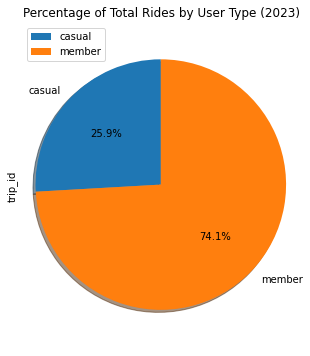

In [92]:
df_user_type = df.groupby(['user_type' ], as_index = True).agg({'trip_id': 'count'})

df_user_type['trip_id'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                            shadow=True,       # add shadow      
                            )

plt.title('Percentage of Total Rides by User Type (2023)')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_user_type.index, loc='upper left') 


plt.show()

The pie chart shows how the total number of trips is divided between the two types of users. Most of the rides account for the members compared to casual riders.

### 5.1.5 Numbers of rides by member types across hours.

In [93]:
df_hour = df.groupby(['user_type','hour' ], as_index=False).agg({'trip_id': 'count'})
df_hour

,user_type,hour,trip_id
0,casual,0,4685
1,casual,1,3402
2,casual,2,2120
3,casual,3,1164
4,casual,4,1018
5,casual,5,1637
6,casual,6,3835
7,casual,7,6874
8,casual,8,9408
9,casual,9,8819


<AxesSubplot:xlabel='hour', ylabel='trip_id'>

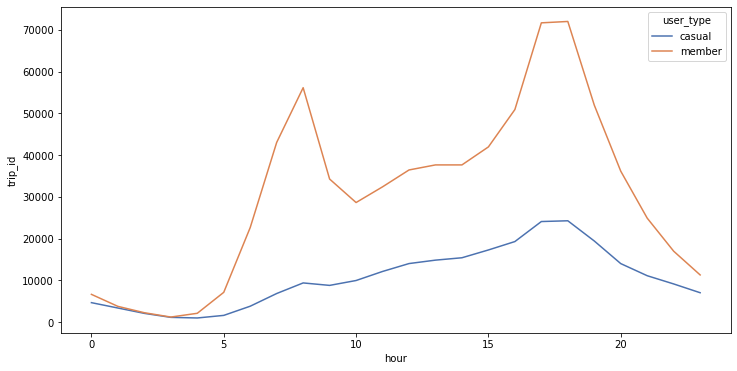

In [94]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hour , x='hour', y='trip_id', hue='user_type', palette='deep')


The line plot displays the usage of bikes by two user types within a 24-hour period. The two lines fluctuate throughout the day. As far as I can tell, the plot shows that the most trips occur during the morning hours between 6 and 9 AM and in the late afternoon between 4 and 7 PM. We can assume this is due to peak hours in NYC.

### 5.1.6 Numbers of rides by member types across days.

In [95]:
df_user_type = df.groupby(['user_type', 'day' ], as_index = False).agg({'trip_id': 'count'})


<AxesSubplot:xlabel='day', ylabel='trip_id'>

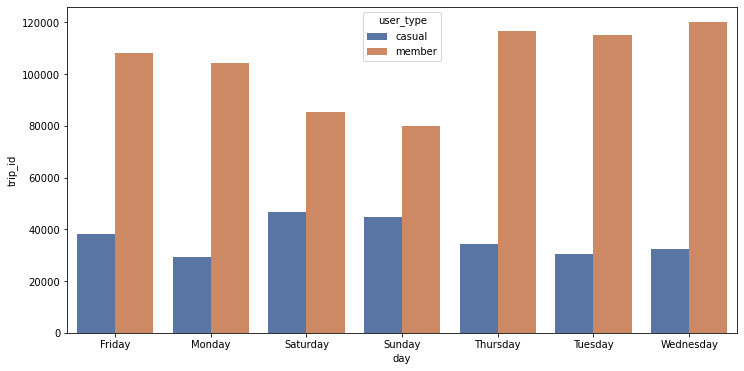

In [96]:
import plotly.express as px
plt.figure(figsize=(12, 6))

sns.barplot(data=df_user_type, x= 'day', y='trip_id', hue='user_type', palette='deep')


The plot reveals that bike usage by casual riders is very consistent throughout the week, with Saturday and Sunday showing the highest number of casual rides. Meanwhile, members have the most bike trips during the week, with Thursday, Tuesday, and Wednesday being the days with the highest number of trips. The second highest usage occurs on Friday and Monday, while Saturday and Sunday have the lowest usage for member riders.

##### WHY?

### 5.1.7 Numbers of rides by member types across months

In [97]:
d1 = df.groupby(['user_type','month'], as_index = False).agg({'trip_id':'count'})

<AxesSubplot:xlabel='month', ylabel='trip_id'>

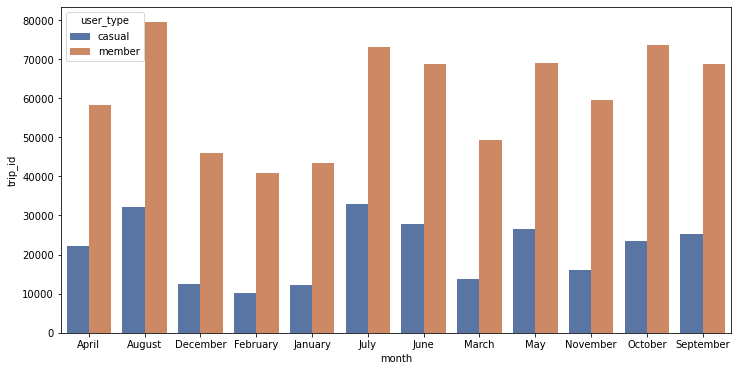

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(data=d1 , x='month', y='trip_id', hue='user_type', palette='deep')



The bar chart shows the number of bike uses throughout the year. The plot reveals that most trips are made by members, with December, February, and January showing the lowest usage for them. In contrast, June, July, and August have the highest usage for casual riders.

## 5.2 Ride durations

In [99]:
month_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
               'November', 'December']

df['month'] = pd.Categorical(df['month'], categories=month_ordered, ordered=True) #Order the months
df_user_type = df.groupby(['user_type', 'month'], as_index = True).agg({'ride_duration': 'mean'})
df_user_type

ride_duration
user_type month                   
casual    January        15.191435
          February       13.350248
          March          14.163266
          April          18.632430
          May            19.956730
          June           18.291195
          July           17.862522
          August         16.663504
          September      15.594933
          October        15.171065
          November       12.838088
          December       12.123799
member    January         8.682465
          February        7.659009
          March           7.742676
          April           8.232595
          May             9.426967
          June            9.213381
          July            9.260834
          August          8.670632
          September       8.739472
          October         8.878356
          November        7.629789
          December        7.206249

<AxesSubplot:xlabel='month', ylabel='ride_duration'>

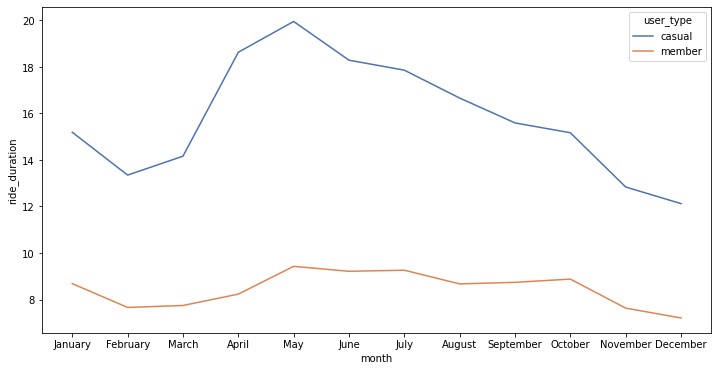

In [100]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_user_type , x='month', y='ride_duration', hue='user_type', palette='deep')


The line chart shows that casual riders tend to have longer ride durations compared to members. For casual rides, the highest ride durations occur between March and October. Additionally, the ride durations for casual riders remain consistent throughout the day.

## 5.3 Type of bikes

### 5.3.1 Which types of bikes are most popular

In [101]:
df_bike_type = df.groupby(['bike_type'], as_index = True).agg({'trip_id':'count'})

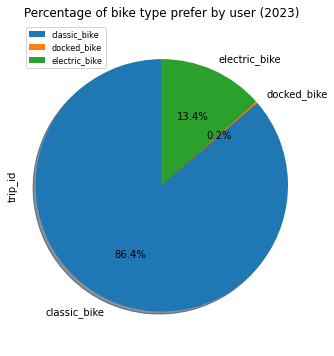

In [102]:
plt.figure(figsize=(12, 6))

# Create a stacked bar chart
df_bike_type['trip_id'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                            shadow=True,       # add shadow      
                            )

plt.title('Percentage of bike type prefer by user (2023)')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_bike_type.index, loc='upper left', fontsize = 8) 
plt.show()

The plot displays the most preferred mode of transportation by Citi Bike users in NYC, is the classic bike.

## 5.4 Act Phase
The "Act" phase is the phase where we execute the solutions to solve our problems. After receiving feedback and carry out improvements, we finally decide the best course of action.

Deliverable: Top three recommendations based on the analysis


### 5.4.1 Top three recommendations based on the analysis

After a thorough analysis of the data, our findings reveal:

1. Casual riders use the service more during the summer season
2. Member bikers use the service in the early morning between 6-9 am and in the late afternoon between 4-6 pm. ( Further analysis needs to be done to determine the cause. For now, we can assume it's for work, but it could be for other reasons).
3. Casual bikers rode their bikes more compared to members.
4. The most frequently used mode of transportation is the classic bike.